# Notebook for Running MASA Package and Comparing to StatsModels

### Import Packages

In [1]:
import MASA

In [2]:
#Import python packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Exploratory Data Analysis

In [3]:
#Set chart background to seaborn and import dataset
sn.set()
data = pd.read_csv(r'C:\Users\nickp\Desktop\Datasets\Linear Regression Datasets\births.csv')
data.head()

,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie,MomRace
0,1,1,32,40,1,38,0,111,0,0,white
1,1,2,32,37,1,34,0,116,0,0,white
2,1,1,27,39,1,12,0,138,0,0,white
3,1,1,27,39,1,15,0,136,0,0,white
4,1,1,25,39,1,32,0,121,0,0,white


In [4]:
#Change this to on to run with large dataset
# data = pd.concat([data1]*300).reset_index()

In [5]:
#Dictionaries for mapping
gender = {1: 'male',
       2: 'female'}

marital_status = {1: 'married',
                 2: 'not married'}

smoker = {1: 'yes',
         0: 'no'}

#premature defined as less than 36 weeks
premie = {0: 'no',
         1: 'yes'}

In [6]:
#lists for mapping dictionaries to new columns
numeric_to_categorical_dicts = [gender, marital_status, smoker, premie]
mapping_columns_list = ['Sex', 'Marital', 'Smoke', 'Premie']

#Zip above lists to run mapping of dictionaries
for a, b in zip(numeric_to_categorical_dicts, mapping_columns_list):
    data[b+'_category'] = data[b].map(a)

In [7]:
#Check data types
data.dtypes

Plural               int64
Sex                  int64
Mom Age              int64
Weeks                int64
Marital              int64
Weight Gained        int64
Smoke                int64
BirthWeightOz        int64
Low                  int64
Premie               int64
MomRace             object
Sex_category        object
Marital_category    object
Smoke_category      object
Premie_category     object
dtype: object

In [8]:
#check null values
data.isnull().sum()

Plural              0
Sex                 0
Mom Age             0
Weeks               0
Marital             0
Weight Gained       0
Smoke               0
BirthWeightOz       0
Low                 0
Premie              0
MomRace             0
Sex_category        0
Marital_category    0
Smoke_category      0
Premie_category     0
dtype: int64

In [9]:
#Check data shape
data.shape

(1409, 15)

In [10]:
#summary statistics
data.describe()

,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.00000
mean,1.036196,1.488999,26.792761,38.649397,1.344925,30.589780,0.146203,116.440738,0.084457,0.12846
std,0.201475,0.500056,6.089151,2.654167,0.475513,13.875535,0.353435,22.125534,0.278171,0.33472
min,1.000000,1.000000,13.000000,22.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.00000
25%,1.000000,1.000000,22.000000,38.000000,1.000000,20.000000,0.000000,106.000000,0.000000,0.00000
50%,1.000000,1.000000,26.000000,39.000000,1.000000,30.000000,0.000000,118.000000,0.000000,0.00000
75%,1.000000,2.000000,31.000000,40.000000,2.000000,40.000000,0.000000,130.000000,0.000000,0.00000
max,3.000000,2.000000,43.000000,45.000000,2.000000,95.000000,1.000000,181.000000,1.000000,1.00000


In [11]:
#Run correlation metrics using pandas correlation function
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_16480\2052960221.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Plural,Sex,Mom Age,Weeks,Marital,Weight Gained,Smoke,BirthWeightOz,Low,Premie
Plural,1.00,-0.01,0.08,-0.33,-0.03,0.09,-0.05,-0.34,0.38,0.30
Sex,-0.01,1.00,0.02,0.05,-0.01,-0.01,-0.01,-0.05,-0.03,-0.03
Mom Age,0.08,0.02,1.00,0.04,-0.47,0.01,-0.11,0.15,-0.07,-0.06
Weeks,-0.33,0.05,0.04,1.00,-0.06,0.06,-0.03,0.59,-0.53,-0.71
Marital,-0.03,-0.01,-0.47,-0.06,1.00,-0.03,0.16,-0.17,0.09,0.10
Weight Gained,0.09,-0.01,0.01,0.06,-0.03,1.00,0.00,0.19,-0.10,-0.03
Smoke,-0.05,-0.01,-0.11,-0.03,0.16,0.00,1.00,-0.13,0.06,0.04
BirthWeightOz,-0.34,-0.05,0.15,0.59,-0.17,0.19,-0.13,1.00,-0.67,-0.50
Low,0.38,-0.03,-0.07,-0.53,0.09,-0.10,0.06,-0.67,1.00,0.50
Premie,0.30,-0.03,-0.06,-0.71,0.10,-0.03,0.04,-0.50,0.50,1.00


In [12]:
#Test my correlation function against the pandas corr function to show they match
start = 'Plural'

for j in data.columns:
    if start ==j:
        continue
    elif data[j].dtype == 'object':
        continue
    else:
        print(start, j)
        print(round(MASA.GetPearsonCorr(data[start].values, data[j].values),2))

Plural Sex
-0.01
Plural Mom Age
0.08
Plural Weeks
-0.33
Plural Marital
-0.03
Plural Weight Gained
0.09
Plural Smoke
-0.05
Plural BirthWeightOz
-0.34
Plural Low
0.38
Plural Premie
0.3


<AxesSubplot:xlabel='BirthWeightOz', ylabel='Count'>

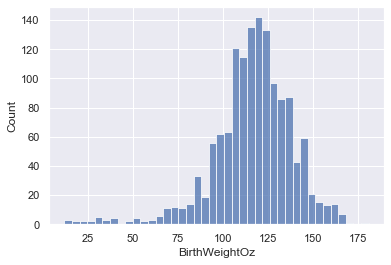

In [13]:
#Distribution plot of y variable
sn.histplot(data['BirthWeightOz'])

<Figure size 432x288 with 0 Axes>

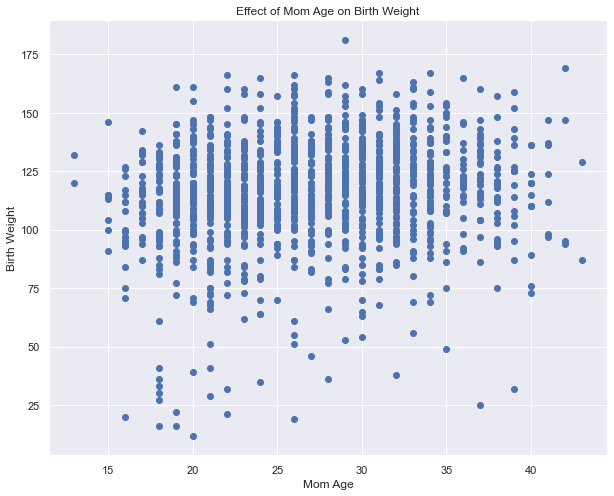

<Figure size 432x288 with 0 Axes>

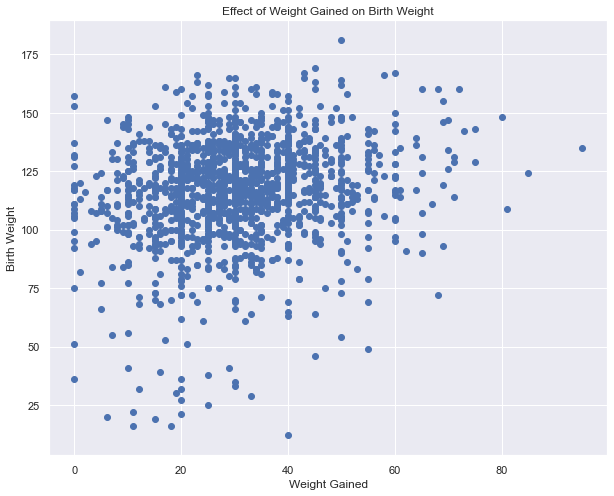

<Figure size 432x288 with 0 Axes>

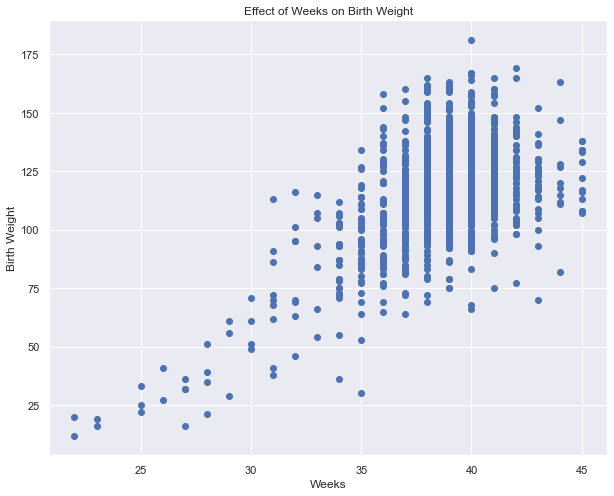

In [14]:
#Run scatter plots to see linear relationship between variables and birth weight and save all charts as a pdf
scatter_columns = ['Mom Age', 'Weight Gained', 'Weeks']

for i in scatter_columns:
    plot2 = plt.figure()
    plt.figure(figsize=(10,8))
    plt.title("Effect of {} on Birth Weight".format(i))
    plt.xlabel(i)
    plt.ylabel('Birth Weight')
    plt.scatter(data[i], data['BirthWeightOz'])

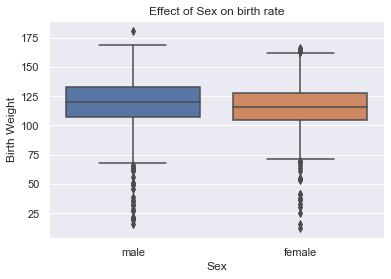

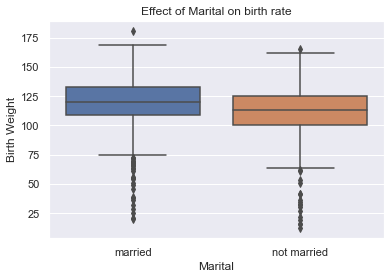

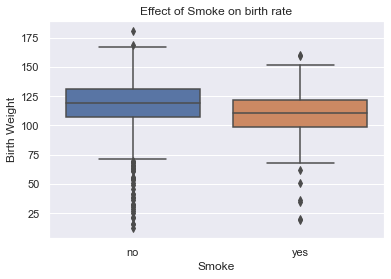

In [15]:
#Show boxplots of categorical columns
cat_columns = ['Sex_category','Marital_category', 'Smoke_category']

for i in cat_columns: 
    ax = sn.boxplot(x=i, y='BirthWeightOz', data=data)
    ax.set_title(f'Effect of {i.split("_", 1)[0]} on birth rate')
    ax.set_ylabel('Birth Weight')
    ax.set_xlabel(i.split("_", 1)[0])
    plt.show()

### Statistical Testing

###### One Sample Testing

In [16]:
#Use Scipy to run One Sample T Test on Numerical Columns
for i in scatter_columns+['BirthWeightOz']:
    print(stats.ttest_1samp(data[i].values, popmean=np.median(data[i])))

Ttest_1sampResult(statistic=4.886984164130392, pvalue=1.1411801443338995e-06)
Ttest_1sampResult(statistic=1.5954962907531698, pvalue=0.11082571284117063)
Ttest_1sampResult(statistic=-4.958418389557999, pvalue=7.970023974152344e-07)
Ttest_1sampResult(statistic=-2.6453356784583444, pvalue=0.00825181799622937)


In [17]:
#Use MASA package to calculate One Sample T Test on Numerical Columns
for i in scatter_columns+['BirthWeightOz']:
    print(f't statistic {i}: ',MASA.Get1SampleTTest(data[i].values, np.median(data[i])))

t statistic Mom Age:  4.886984164130391
t statistic Weight Gained:  1.5954962907531687
t statistic Weeks:  -4.958418389557994
t statistic BirthWeightOz:  -2.6453356784583426


###### Two Sample T Testing

In [18]:
#Use Scipy to compute a two sample t test on the binary categorical variables
#Create dictionary of columns and values where there must be two values in the list per category for the two sample test
categorical_dict = {'Sex_category':['male', 'female'],
                   'Marital_category':['married','not married'],
                   'Smoke_category':['no','yes'],
                   'Premie_category':['no','yes']}



for key, values in categorical_dict.items():
    group1 = pd.DataFrame(data.loc[data[key] == values[0], 'BirthWeightOz'])
    group2 = pd.DataFrame(data.loc[data[key] == values[1], 'BirthWeightOz'])
    print(f'{key}: {stats.ttest_ind(group1["BirthWeightOz"], group2["BirthWeightOz"], equal_var=False)}')

Sex_category: Ttest_indResult(statistic=1.8199238057231555, pvalue=0.06898485861830135)
Marital_category: Ttest_indResult(statistic=6.086566828891462, pvalue=1.7118082284198885e-09)
Smoke_category: Ttest_indResult(statistic=5.107152288314538, pvalue=6.035116492969042e-07)
Premie_category: Ttest_indResult(statistic=14.452685600572453, pvalue=8.694594214499758e-33)


In [19]:
#Use my function to calculate t score for two sample t test comparing to stats package
for key, values in categorical_dict.items():
    print(key)
    group1 = pd.DataFrame(data.loc[data[key] == values[0], 'BirthWeightOz'])
    group2 = pd.DataFrame(data.loc[data[key] == values[1], 'BirthWeightOz'])
    print(MASA.GetTwoSampleTTest(group1["BirthWeightOz"].values, group2["BirthWeightOz"].values, xVariables=values, equalVariance=False))

Sex_category
{'male and female t statistic:': 1.819923805723154}
Marital_category
{'married and not married t statistic:': 6.086566828891463}
Smoke_category
{'no and yes t statistic:': 5.107152288314539}
Premie_category
{'no and yes t statistic:': 14.452685600572453}


### Regression Modelling

###### Create X and Y Datasets

In [20]:
#Create a function to create the input x and y data for the model
def create_x_y(df, x_columns, y_column, variable_drop_cat_dict):
    drop_columns = [key + '_' + value for key, value in variable_drop_cat_dict.items()]
    x = df.copy()
    x = x[x_columns]
    x = pd.get_dummies(x, columns=variable_drop_cat_dict.keys())
    
    x = x.drop(drop_columns, axis=1)
    x = sm.add_constant(x)
    
    y = df.copy()
    y = y[[y_column]]
    
    return x, y

In [21]:
#Lists for splitting data into x and y sets
data['Weeks Squared'] = data['Weeks']**2
x_variables = ['Weight Gained', 'Weeks', 'Weeks Squared', 'Sex_category', 'Marital_category', 'Smoke_category']
y_variable = 'BirthWeightOz'
cat_variable_dict_drop_categories = {'Sex_category': 'male',
                                     'Marital_category': 'not married',  
                                     'Smoke_category': 'no'}

#Run function to get x and y split
x, y = create_x_y(data, x_variables, y_variable, cat_variable_dict_drop_categories)

###### Run Linear Regression Models

In [22]:
#Run regression first using statsmodels to show correct output from popular statistics package
lr = sm.OLS(np.log(y), x)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BirthWeightOz   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     403.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          7.06e-301
Time:                        21:52:45   Log-Likelihood:                 642.30
No. Observations:                1409   AIC:                            -1271.
Df Residuals:                    1402   BIC:                            -1234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.1191      0.311    -16.473      0.000      -5.729      -4.510
Weight Gained                0.0020      0.000      6.778      0.000       0.001       0.003
Weeks                        0.4731      0.017     27.689      0.000       0.440       0.507
Weeks Squared               -0.0057      0.000    -24.149      0.000      -0.006      -0.005
Sex_category_female         -0.0281      0.008     -3.419      0.001      -0.044      -0.012
Marital_category_married     0.0356      0.009      4.058      0.000       0.018       0.053
Smoke_category_yes          -0.0439      0.012     -3.737      0.000      -0.067      -0.021
==============================================================================
Omnibus:                      269.792   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1097.460
Skew:                          -0.867   Prob(JB):                    4.89e-239
Kurtosis:                       6.961   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Call my library and run my linear regression model to compare to stats models
modelnick = MASA.OLSSuite()
modelnick.GetOLSResults(np.log(y.values), x.values, list(x.columns))
pd.DataFrame(modelnick.OLSResults)

,Variables,Model Coefficients,Coef Std. Errors,T Stat
0,const,-5.119099,0.309980,-16.514276
1,Weight Gained,0.002010,0.000296,6.794891
2,Weeks,0.473052,0.017042,27.757823
3,Weeks Squared,-0.005661,0.000234,-24.209580
4,Sex_category_female,-0.028062,0.008186,-3.427922
5,Marital_category_married,0.035596,0.008750,4.067866
6,Smoke_category_yes,-0.043927,0.011726,-3.746133


In [24]:
#Show model metrics from package
pd.DataFrame(modelnick.Metrics,index=[0])

,No. Observations,DoF Residuals,Mean Squared Error,R2,AdjR2Score,Mean Abs. Error
0,1409,1402,0.023527,0.632973,0.631403,0.114045


###### Vif Scores

In [25]:
#Use my vif function to calculate vif scores
vifs = MASA.GetVif(x.values)
for i, j in zip(x.columns, vifs):
    print(i, j)

const nan
Weight Gained 1.0080916989567976
Weeks 122.44312150089347
Weeks Squared 122.24497572567378
Sex_category_female 1.0028409060696337
Marital_category_married 1.0361292332906393
Smoke_category_yes 1.0278766209536259


In [26]:
#Use stats models vif function to compare outputs
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,5754.487666,const
1,1.008092,Weight Gained
2,122.443122,Weeks
3,122.244976,Weeks Squared
4,1.002841,Sex_category_female
5,1.036129,Marital_category_married
6,1.027877,Smoke_category_yes


###### Run MASA ALTOLS function

In [27]:
#Drop weeks squared to let auto fit algorithm decide whether or not to include it
x.drop('Weeks Squared', axis=1, inplace=True)

In [28]:
#Run ALTOLS Model to show that model auto fits to add squared term for weeks squared
#If passing dataframe columns as variable names convert to list before passing through function
modelnick.GetAltOLS(np.log(y.values), x.values, list(x.columns), R2PerformanceThreshold=.002)
pd.DataFrame(modelnick.OLSResults)

,Variables,Model Coefficients,Coef Std. Errors,T Stat
0,const,-5.119099,0.309980,-16.514276
1,Weight Gained,0.002010,0.000296,6.794891
2,Weeks,0.473052,0.017042,27.757823
3,Sex_category_female,-0.028062,0.008186,-3.427922
4,Marital_category_married,0.035596,0.008750,4.067866
5,Smoke_category_yes,-0.043927,0.011726,-3.746133
6,Weeks_square,-0.005661,0.000234,-24.209580


In [29]:
#Show Model Results after the Auto Linear Transformation Model is ran
pd.DataFrame(modelnick.Metrics, index=[0])

,No. Observations,DoF Residuals,Mean Squared Error,R2,AdjR2Score,Mean Abs. Error
0,1409,1402,0.023527,0.632973,0.631403,0.114045
